In [1]:
# Machine learning

# Supervised Learning(지도학습) - 예측하는 모델, 예측대상(t, target ,Label)
    # 1. Linear Algorithm(회귀분석) - 예측대상이 연속값(continuous)
    # 2.classification Algorithm(분류분석) - 예측대상이 불연속값()
# Unsuperviesed Learning(비지도학습) - 예측하지 않음
    # 1. clustering(군집분석) - 유사한 특성을 갖는 데이터끼리 묶는다

In [2]:
# pip install scipy scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data_ml/Ecommerce Customers.txt')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# 머신러닝 모두 숫자형 데이터
# nan값 없어야함

In [6]:
# 연간 지출금액을 에측하는 회귀모델

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = df.drop(columns =['Email','Address','Avatar','Yearly Amount Spent'])
y = df['Yearly Amount Spent']

In [9]:
# train_test로 분리
# train - 학습용 데이터
# test - 모델을 평가 시 사용할 데이터 
# 모델을 테스트할때는 모델을 훈련할때 이용한 데이터가 포함되면 안됨(test데이터에 train데이터가 들어있으면 결과가 엄청 잘나옴)


In [10]:
# 순서 중요
# 섞어서 뽑는 방식
# 시계열에는 train_test_split 사용하면 안됨 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2 ,random_state=111)

In [11]:
# x_train= x[: 300] 직접지정할 수도 있지만 굳이..

In [12]:
# LinearRegression 모듈을 import
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
#algorithm(=machine model) train => fit()
#model train

In [15]:
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
#predict

In [17]:
# x_test값을 가지고 예측
preds = lr.predict(x_test)

In [18]:
# evaluation

In [19]:
from sklearn.metrics import r2_score
# R^2 회귀모델이 없었을때의 값(평균) 회귀모델이 있어서 줄어든 오차값 
# R^2가 클수록 설명력이 크다
# 회귀모델 설명력 : ssr/sst

In [20]:
r2_score(preds, y_test)

0.9850895763407301

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
# MSE : sig(y - y_hat)**2 
# RMSE : np.sqrt(sig(y - y_hat)**2 )
# MAE : sig(abs(y-y_hat))

In [23]:
print('MSE :', mean_squared_error(y_test, preds))
print("RMSE :", np.sqrt(mean_squared_error(y_test, preds)))
print("MAE : ", mean_absolute_error(y_test, preds))

MSE : 105.36217783099016
RMSE : 10.264608021302625
MAE :  8.101929980887277


In [26]:
import matplotlib.pyplot as plt

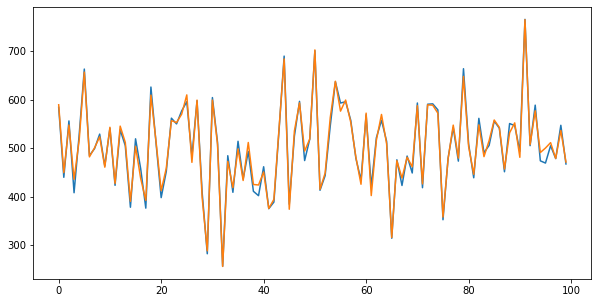

In [27]:
plt.figure(figsize=(10,5))
plt.plot(range(100), y_test[:100])
plt.plot(range(100), preds[:100])